# Tutorial 1 - Artificial Pigeon Brain 

## Last Lecture
* Biological Neural Networks (BNNs)
* Artificial Neurons Networks (ANNs)
* Forward Pass
* Activation Functions
* Mean Squared Error and Cross-Entropy
* Gradient Descent and Backpropagation
* Nonlinearity

Sample code:

#### Example: 1-layer ANN with MSE and Gradient Descent


In [1]:
import math

# data (first column is the bias term)
x = [[1, 0.1,-0.2], 
     [1,-0.1, 0.9], 
     [1, 1.2, 0.1], 
     [1, 1.1, 1.5]]

# labels (desired output)
t = [0, 0, 0, 1]

# initial weights
w = [1, -1, 1]

iterations = 50
learning = 10

def simple_ann_MSE(x, w, t, iterations, learning):

    E = []
    
    # iterate over epochs
    for ii in range(iterations):
        err = [] 
        y = []
        # iterate over all the samples x
        for n in range(len(x)):
            v = 0
            # compute w.x
            for p in range(len(x[0])):
                v = v + x[n][p]*w[p]
            
            # sigmoidal activation    
            y.append(1 / (1 + math.e**(-v))) 
            
            # MSE classification error
            err.append((y[n]-t[n])**2)
            
            # gradient descent to compute new weights
            for p in range(len(w)):
                d = x[n][p]*(y[n]-t[n])*(1-y[n])*(y[n])
                w[p] = w[p] - learning*d
                
        # sum up classification error
        E.append(sum(err)/len(x))
    
    return (y, w, E)

(y, w, E) = simple_ann_MSE(x, w, t, iterations, learning)

In [2]:
print(y)

[0.0006555859880223744, 0.052128479309599574, 0.04486688739303947, 0.9484229735074757]


#### Example: 1-layer ANN with Cross-Entropy and Gradient Descent

In [3]:
def simple_ann_CE(x, w, t, iterations, learning):

    E = []
    
    #iterate over epochs
    for ii in range(iterations):
        err = [] 
        y = []
        
        #iterate over all the samples x
        for n in range(len(x)):
            v = 0
            
            #compute w.x
            for p in range(len(x[0])):
                v = v + x[n][p]*w[p]
                
            # v is the dot product of the input features and the weights
            
            #sigmoidal activation
            y.append(1 / (1 + math.e**(-v))) 
            
            #cross-entropy classification error
            err.append(-t[n]*math.log(y[n]+ 0.000001) - (1-t[n])*math.log(1-y[n]+ 0.000001))

            #gradient descent to compute new weights
            for p in range(len(w)):
                # d is the gradient of the loss function with respect to the weights
                d = x[n][p]*(y[n]-t[n]) #cross_entropy
                w[p] = w[p] - learning*d
                
        #sum up classification error
        E.append(sum(err))
    
    return (y, w, E)

(y, w, E) = simple_ann_CE(x, w, t, iterations, learning)

In [4]:
print(y)
print(E)

[1.5220611182206673e-12, 9.152891744525407e-08, 0.00020457583967445263, 0.9995046474331183]
[0.3505461395371315, 6.805376705476292, 26.564614243221254, 4.524869189402009, 0.00581592932568457, 0.004531305013205282, 0.0037402867346008617, 0.003200165906455406, 0.0028065871303956874, 0.0025065651988698794, 0.0022701268143129998, 0.0020789625276250003, 0.0019212227892200567, 0.0017888843530261722, 0.0016763134028960054, 0.0015794335299080592, 0.0014952200461149775, 0.0014213800173908835, 0.0013561428005760547, 0.001298118861471155, 0.0012462021759714142, 0.0011995012467585734, 0.0011572893800816282, 0.001118968213772658, 0.0010840405428184413, 0.0010520897843389828, 0.0010227642597937382, 0.0009957650231825878, 0.0009708363340984405, 0.0009477581274454128, 0.0009263400073189873, 0.0009064164163366016, 0.0008878427201236448, 0.0008704920106039989, 0.0008542524785172298, 0.0008390252401733997, 0.000824722529291096, 0.0008112661842396662, 0.0007985863758108651, 0.0007866205320193084, 0.000775

### Exploring the Iris dataset

Let us modify the above code to work with the iris data set.

To begin, load the iris data into Google Colab. Last time we had some difficulty with this, so it's suggested that you use Chrome or Chromium. Another approach to load the iris data is shown below:

In [5]:
# use sklearn.datasets to load iris data
from sklearn.datasets import load_iris
features, labels = load_iris(return_X_y=True)

The iris data has 150 samples spread across three classes: 
1. Iris-setosa, 
2. Iris-versicolor,
3. Iris-virginica. 

There are three features used: 
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

To keep things simple, let us pick two of the classes and perform binary classification with our sample code. We will select **Iris-setosa** and **Iris-versicolor** to start:

In [6]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# classification iris-setosa and iris-versicolor
import numpy as np

indices = np.array(range(0,100))

#setup x matrix
x = np.zeros((len(indices), 4 + 1))
x[:,1:5] = features[indices,:]
print(x)
#add bias column
x[:,0] = np.ones(len(indices))
print(x)

#labels
t = labels[indices]

# initial weights
w = np.random.rand(5)

iterations = 100
learning = 0.0001

(y, w, E) = simple_ann_CE(x, w, t, iterations, learning)

[[0.  5.1 3.5 1.4 0.2]
 [0.  4.9 3.  1.4 0.2]
 [0.  4.7 3.2 1.3 0.2]
 [0.  4.6 3.1 1.5 0.2]
 [0.  5.  3.6 1.4 0.2]
 [0.  5.4 3.9 1.7 0.4]
 [0.  4.6 3.4 1.4 0.3]
 [0.  5.  3.4 1.5 0.2]
 [0.  4.4 2.9 1.4 0.2]
 [0.  4.9 3.1 1.5 0.1]
 [0.  5.4 3.7 1.5 0.2]
 [0.  4.8 3.4 1.6 0.2]
 [0.  4.8 3.  1.4 0.1]
 [0.  4.3 3.  1.1 0.1]
 [0.  5.8 4.  1.2 0.2]
 [0.  5.7 4.4 1.5 0.4]
 [0.  5.4 3.9 1.3 0.4]
 [0.  5.1 3.5 1.4 0.3]
 [0.  5.7 3.8 1.7 0.3]
 [0.  5.1 3.8 1.5 0.3]
 [0.  5.4 3.4 1.7 0.2]
 [0.  5.1 3.7 1.5 0.4]
 [0.  4.6 3.6 1.  0.2]
 [0.  5.1 3.3 1.7 0.5]
 [0.  4.8 3.4 1.9 0.2]
 [0.  5.  3.  1.6 0.2]
 [0.  5.  3.4 1.6 0.4]
 [0.  5.2 3.5 1.5 0.2]
 [0.  5.2 3.4 1.4 0.2]
 [0.  4.7 3.2 1.6 0.2]
 [0.  4.8 3.1 1.6 0.2]
 [0.  5.4 3.4 1.5 0.4]
 [0.  5.2 4.1 1.5 0.1]
 [0.  5.5 4.2 1.4 0.2]
 [0.  4.9 3.1 1.5 0.2]
 [0.  5.  3.2 1.2 0.2]
 [0.  5.5 3.5 1.3 0.2]
 [0.  4.9 3.6 1.4 0.1]
 [0.  4.4 3.  1.3 0.2]
 [0.  5.1 3.4 1.5 0.2]
 [0.  5.  3.5 1.3 0.3]
 [0.  4.5 2.3 1.3 0.3]
 [0.  4.4 3.2 1.3 0.2]
 [0.  5.  3

In [9]:
x

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2],
       [1. , 5.4, 3.9, 1.7, 0.4],
       [1. , 4.6, 3.4, 1.4, 0.3],
       [1. , 5. , 3.4, 1.5, 0.2],
       [1. , 4.4, 2.9, 1.4, 0.2],
       [1. , 4.9, 3.1, 1.5, 0.1],
       [1. , 5.4, 3.7, 1.5, 0.2],
       [1. , 4.8, 3.4, 1.6, 0.2],
       [1. , 4.8, 3. , 1.4, 0.1],
       [1. , 4.3, 3. , 1.1, 0.1],
       [1. , 5.8, 4. , 1.2, 0.2],
       [1. , 5.7, 4.4, 1.5, 0.4],
       [1. , 5.4, 3.9, 1.3, 0.4],
       [1. , 5.1, 3.5, 1.4, 0.3],
       [1. , 5.7, 3.8, 1.7, 0.3],
       [1. , 5.1, 3.8, 1.5, 0.3],
       [1. , 5.4, 3.4, 1.7, 0.2],
       [1. , 5.1, 3.7, 1.5, 0.4],
       [1. , 4.6, 3.6, 1. , 0.2],
       [1. , 5.1, 3.3, 1.7, 0.5],
       [1. , 4.8, 3.4, 1.9, 0.2],
       [1. , 5. , 3. , 1.6, 0.2],
       [1. , 5. , 3.4, 1.6, 0.4],
       [1. , 5.2, 3.5, 1.5, 0.2],
       [1. , 5.2, 3.4, 1.4, 0.2],
       [1. , 4

In [10]:
for i in range(len(t)):
  print(t[i], y[i])

0 0.2130147771701025
0 0.25371013051838043
0 0.23842639387904238
0 0.2756255967323325
0 0.2111561247649541
0 0.23710648208433932
0 0.2576671250273546
0 0.23426036488726595
0 0.286431970921717
0 0.24298970211694265
0 0.19749100620189902
0 0.2561239406191295
0 0.2417033407695713
0 0.2302993969330181
0 0.1392862948128214
0 0.17230159289256614
0 0.1905317560693647
0 0.22438662399532527
0 0.21224170559010389
0 0.21751767251747936
0 0.2363195664108831
0 0.23773259271322653
0 0.18380743734325455
0 0.3075745070495664
0 0.2937223907923205
0 0.27006638207470557
0 0.27467019465326115
0 0.21525068341892764
0 0.20978780736214914
0 0.2719483352165826
0 0.2731887402445527
0 0.2397794897893875
0 0.16926882916511052
0 0.15515430564092073
0 0.25419839832755103
0 0.2074625898109926
0 0.1796383017706829
0 0.19735495685660984
0 0.2614360953779406
0 0.22418597308769161
0 0.21402250241504964
0 0.3227805853155496
0 0.24749005123812434
0 0.297885609138176
0 0.2776677730813594
0 0.26741041667846327
0 0.21039792

We're able to successfully classify iris-setosa and iris-versicolor.

In [11]:
# classification iris-versicolor and iris virginica
indices = np.array(range(50,150))

#setup x matrix
x = np.zeros((len(indices), 4 + 1))
x[:,1:5] = features[indices,:]

#add bias column
x[:,0] = np.ones(len(indices))

#labels
t = labels[indices]-1

# initial weights
w = np.random.rand(5)

iterations = 100
learning = 0.0001


(y, w, E) = simple_ann_CE(x, w, t, iterations, learning)

In [12]:
for i in range(len(t)):
  print(t[i], y[i])

0 0.5061433124112129
0 0.5396063241566587
0 0.5177936508487565
0 0.5435891428124653
0 0.5284868380348152
0 0.5402355605181184
0 0.5506448652495712
0 0.5344746160077897
0 0.5012523388140105
0 0.5655371985792378
0 0.5245004851195871
0 0.548786333720056
0 0.48395243242822544
0 0.5284797704382209
0 0.5365533037994924
0 0.5027424192311768
0 0.5577932445631262
0 0.49383725896188785
0 0.5224279202614955
0 0.5086848114897852
0 0.5744460000882669
0 0.5091501450902302
0 0.5182738034343664
0 0.4981926671887738
0 0.4950334354610988
0 0.49680072787841933
0 0.48563426553721306
0 0.5217686774312863
0 0.5293348132317547
0 0.486741257098887
0 0.50331658643771
0 0.4923906609642589
0 0.5020498602097888
0 0.5340989050330185
0 0.5517643870201114
0 0.5386017557744703
0 0.4938082606960904
0 0.48233983609592185
0 0.5191720146796275
0 0.5180070466075963
0 0.5082453163750691
0 0.5049314760938355
0 0.4931813551869953
0 0.5049537654945359
0 0.5119088824385282
0 0.4993316520168656
0 0.5077786549965977
0 0.48449801

The performance on the iris-versicolor and iris virginica is not as good. To find out why, we will try to visualize the data.

### Visualize Iris Dataset
Since the Iris dataset has only 4 inputs we can try to visualize it on a 2-dimensional plane to get a better idea of what is happening.

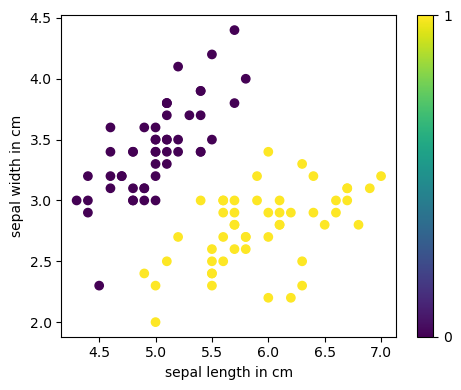

In [13]:
#scatter plot of iris-setosa and iris-versicolor
import numpy as np
from matplotlib import pyplot as plt

indices = np.array(range(0,100))

selected_features = features[indices,:]
selected_labels = labels[indices]

feature_name = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']

x_index = 0
y_index = 1

plt.figure(figsize=(5, 4))
plt.scatter(selected_features[:,x_index], selected_features[:,y_index], c= selected_labels)
plt.colorbar(ticks=[0, 1, 2])
plt.xlabel(feature_name[x_index])
plt.ylabel(feature_name[y_index])

plt.tight_layout()
plt.show()

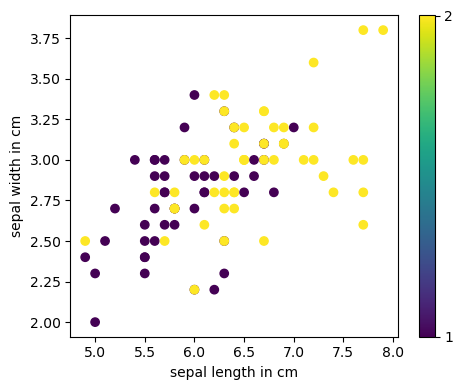

In [14]:
# scatter plot of iris-versicolor and iris virginica
import numpy as np
from matplotlib import pyplot as plt

indices = np.array(range(50,150))

selected_features = features[indices,:]
selected_labels = labels[indices]

feature_name = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']

x_index = 0
y_index = 1

plt.figure(figsize=(5, 4))
plt.scatter(selected_features[:,x_index], selected_features[:,y_index], c= selected_labels)
plt.colorbar(ticks=[0, 1, 2])
plt.xlabel(feature_name[x_index])
plt.ylabel(feature_name[y_index])

plt.tight_layout()
plt.show()

### Nonlinear Separation
Our 1-layer ANN was only successful one of the binary classification combinations. A 1-layer ANN is unable to handle nonlinear separations (or decisions boundaries). To address this we can introduce a second layer known as a hidden layer. How could we do this?

We can just include an additional 1-layer networks as shown in the image below. 

![alt text](https://miro.medium.com/max/1000/1*sX6T0Y4aa3ARh7IBS_sdqw.png)


We would follow the same process as with the 1-layer network:

1. write out the equations for the forward pass
2. error term can stay the same MSE or Cross-Entropy
3. Gradient descent would be applied now to two layers of weights

First we would consider the forward pass for a 2-layer ANN. We could use a sigmoidal (logistic) activation function to keep things consistent with our earlier example. Note that the activation function will be applied once on the hidden layer, and also on the output layer.

Computing the gradient with respect to the different layers of weights will become more difficult, but still manageable. There are just some additional terms in the chain rule. The second layer weights will be almost identical to what we computed for a 1-layer network, except the input will be the hidden layer activation.

Instead of spending the time to compute gradients with each change to the network, which can be a fun mathematical exercise, we will instead focus on using the PyTorch libraries which handle all of this internally.

### (Optional) Develop a 2-layer ANN
Build a 2-layer network using cross-entropy. Determine the gradients with resepect to the layer 1 and layer 2 weights. How could you validate if the gradients were computed correctly?

In [20]:
#write code to build a 2-layer network using cross-entropy

def simple_ann_CE_2layer(x, w1, w2, t, iterations, learning):
    E = []
    
    #iterate over epochs
    for ii in range(iterations):
        err = [] 
        y = []
        
        #iterate over all the samples x
        for n in range(len(x)):
            v = 0
            
            #compute w.x
            for p in range(len(x[0])):
                v = v + x[n][p]*w[p]
                
            # v is the dot product of the input features and the weights
            
            #sigmoidal activation
            y.append(1 / (1 + math.e**(-v))) 
            
            #cross-entropy classification error
            err.append(-t[n]*math.log(y[n]+ 0.000001) - (1-t[n])*math.log(1-y[n]+ 0.000001))

            #gradient descent to compute new weights
            for p in range(len(w)):
                # d is the gradient of the loss function with respect to the weights
                d = x[n][p]*(y[n]-t[n]) #cross_entropy
                w[p] = w[p] - learning*d
                
        #sum up classification error
        E.append(sum(err))
    
    return (y, w, E)

In [21]:
# predict iris-versicolor vs iris virginica
indices = np.array(range(50,150))

#setup x matrix
x = np.zeros((len(indices), 4 + 1))

x[:,1:5] = features[indices,:]

#add bias column
x[:,0] = np.ones(len(indices))

#labels
t = np.zeros((len(indices), 2))

for i in range(len(indices)):
    t[i][labels[indices[i]]-1] = 1

# initial weights
w1 = np.random.rand(5, 4)
w2 = np.random.rand(5, 2)

iterations = 100
learning = 0.0001

(y, w1, w2, E) = simple_ann_CE_2layer(x, w1, w2, t, iterations, learning)

for i in range(len(t)):
    print(t[i], y[i])
    

ValueError: shapes (4,) and (5,2) not aligned: 4 (dim 0) != 5 (dim 0)


### What is PyTorch?

PyTorch is a scientific computing package that builds on the NumPy library to allow for the use of GPUs. It incorporates deep learning capabilities while maximizing flexibility and speed.

### PyTorch Basics

To use PyTorch you must first import the library









In [19]:
import torch

#### Tensors
Tensors are n-dimensional arrays that allow that can be used with a GPU to accelerate computing. There are several ways to work with Tensors:

In [ ]:
# initialize a random tensor
x = torch.rand(4, 3)
print(x)

In [ ]:
# initialize a tensor loaded with zeros
x = torch.zeros(4, 3)
print(x)

In [ ]:
# initialized with data entered manually
x = torch.tensor([2.1, 4.0, -5.2])
print(x)

In [ ]:
# initialized with data from numPy
import numpy as np
data = np.array([2.1, 4.0, -5.2])
print(data)
x = torch.tensor(data)
print(x)

# note you can easily convert fron tensor to numpy
x_np = x.numpy()
print(x_np)

### Tensor size and shape

In [ ]:
# obtain size of tensor data structure
x = torch.zeros(4, 3)
print(x.size())

### Operations


In [ ]:
# tensor addition
x = torch.rand(4, 3)
y = torch.ones(4, 3)
print(x + y)

In [ ]:
# tensor multiplication
x = torch.rand(4, 3)
y = torch.ones(4, 3)
print(x * y)

In [ ]:
# Provide output tensor as argument
result = torch.ones(4,3)
torch.add(x, y, out = result)
print(result)

In [ ]:
# resize and reshape tensors
x = torch.randn(4, 3)
y = x.view(12)
z = x.view(-1, 4)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

In [ ]:
# convert one element tensor to a Python number
x = torch.randn(1)
print(x)
print(x.item())

### Automatic Differentiation

The PyTorch autograd package allows for easy computation of derivative. This is handled automatically using a define-by-run framework, which works as you write your code. 

To enable this feature you need to set the Tensor attribute .required_grat to True, at which point it begins to track all operations performed on it. After your computation have been completed you can call .backward() and all the gradients will be computed for you. The gradient for each tensor will be stored in the tensor attribute .grad.

Each tensor also has a .grad_fn attribute which references Function that has created it.



In [ ]:
# Example computation of gradients
x = torch.rand(4, 3, requires_grad=True)
print(x)

#perform some operations
y = x + 10
z = y*y
out = z.mean()

print(z, out)

In [ ]:
# compute the gradient with respect to the output
out.backward()
print(x.grad)

## Artificial Neural Networks in PyTorch
In this example we will train an "artificial pigeon" to perform a digit recognition
task. That is, we will use the MNIST dataset of hand-written digits, and train
the pigeon to **recognize a small digit, namely a digit that is less than 3**.
This problem is a **binary classification problem** we want to predict
which of two classes an input image is a part of.

### 1) Load MNIST Data
The MNIST dataset contains hand-written digits that are 28x28=784 pixels large.
Here are a few digits in the dataset:


In [ ]:
from torchvision import datasets, transforms

# load the data
mnist_train = datasets.MNIST('data', train=True, download=True)
mnist_train = list(mnist_train)[:2000]

In [ ]:
# plot the first 18 images in the training data
for k, (image, label) in enumerate(mnist_train[:18]):
    plt.subplot(3, 6, k+1)
    plt.imshow(image)


### 2) Defining the ANN Forward Pass
Here is an implementation of the artificial pigeon brain in PyTorch.
Don't worry if this code or the explanations don't make sense yet.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting

import torch.optim as optim

torch.manual_seed(1) # set the random seed

class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(784, 30) # 784 = 28x28 every pixel is a feature
        
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

In this network, there are 28x28 = 784 input neurons, to work with our 28x28 pixel images. We have a single output neuron and a hidden layer of 30 neurons.

The variable `pigeon.layer1` contains information about the connectivity
between the input layer and the hidden layer (stored as a matrix), and the
biases (stored as a vector).

Similarly, the variable `pigeon.layer2` contains information about the weights
between the hidden layer and the output layer, and the bias.

The weights and biases adjust during training, so they are called the model's
**parameters**.

In [ ]:
# view parameters
for w in pigeon.layer1.parameters():
    print(w)

### 3) Test Network Forward Pass
Here is an example of using the network to classify whether the
image contains a small digit.

In [ ]:
# make predictions for the first 10 images in mnist_train
img_to_tensor = transforms.ToTensor() #transform the image data into a 28x28 matrix of numbers

for k, (image, label) in enumerate(mnist_train[:10]):
    inval = img_to_tensor(image)
    outval = pigeon(inval)       # find the output activation given input
    prob = torch.sigmoid(outval) # turn the activation into a probability
    print(prob)

Since we haven't trained the network
yet, the predicted probability of images containing a small digit 
is close to half. The "pigeon" is unsure.

In order for the network to be useful, we need to actually train it, so
that the weights are actually meaningful, non-random values.

### 4) Update Parameters using Gradient Descent with Cross-Entropy
To update the parameters (weights) we will first use the network to make predictions, then compare the predictions
agains the ground truth. To compare the predictions against actual values we'll compute a classification error using the Cross-Entropy equation.

The classification error, that is how good or bad the prediction was compared to the actual values is more commonly referred to as the **loss** and Cross-Entropy is the **loss function**. The introduction of a loss function makes our problem a **optimization** problem: what set of parameters minimizes the loss across the training examples?

Turning a learning problem into an optimization problem
is actually a very subtle but important step in many machine learning tools,
because it allows us to use tools from mathematical optimization.

That there are **optimizers** that can tune the network parameters for
us is also really, really cool. The gradient descent algorithm we derived in the last lecture is one example of an optimizer.

For now, we will choose a standard loss function for a binary classification
problem: the **binary cross-entropy loss**. We'll also choose
a **stochastic gradient descent** optimizer. We'll talk about
what these mean later in the course.

In [ ]:
# simplified training code to train `pigeon` on the "small digit recognition" task
import torch.optim as optim
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005)

Now, we can start to train the pigeon network, similar to the way we would train
a real pigeon:

1. We'll show the network pictures of digits, one by one
2. We'll see what the network predicts
3. We'll check the loss function for that example digit, comparing the network prediction against the ground truth
4. We'll make a small update to the parameters to try and improve the loss for that digit
5. We'll continue doing this many times -- let's say 1000 times

For simplicity, we'll use 1000 images, and show the network each image only once.

In [ ]:
for (image, label) in mnist_train[:1000]:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

It is very common to run into errors with changing different data types to tensors with the correct shape.

### 5) Test Updated Network Forward Pass

In [ ]:
# make predictions for the first 10 images in mnist_train
for k, (image, label) in enumerate(mnist_train[:10]):
    print(label, torch.sigmoid(pigeon(img_to_tensor(image))))

Not bad! We'll use the probability 50% as the cutoff for making a 
discrete prediction. Then, we can compute the accuracy on the 1000
images we used to train the network.

### 6)a) Validation of Network on Training Data

In [ ]:
# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train[:1000]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/1000)
print("Training Accuracy:", 1 - error/1000)

The accuracy on those 1000 images is 96%, which is really good considering
that we only showed the network each image only once.

However, this accuracy is not representative of how well the network is doing,
because the network was *trained* on the data. The network had a chance to
see the actual answer, and learn from that answer. To get a better sense of
the network's predictive accuracy, we should compute accuracy numbers on
a **test set**: a set of images that were not seen in training.

### 6)b) Validation of Network on Testing Data

In [ ]:
# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_train[1000:2000]:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/1000)
print("Test Accuracy:", 1 - error/1000)